<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados I
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

Aluna: Maria Luiza Cordeiro

---

# **Tópicos**

<ol type="1">
  <li>Pacote Seaborn;</li>
  <li>Categorias: Gráficos de Barras e de Setores;</li>
  <li>Tendências: Gráficos de Linha e de Área.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preço do diamante por tipo de corte

In [1]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
# gráfico do exercício 1

diamonds = data[['cut', 'price']].groupby('cut').agg('mean').sort_values('price').reset_index()
diamonds

,cut,price
0,Ideal,3457.541970
1,Good,3928.864452
2,Very Good,3981.759891
3,Fair,4358.757764
4,Premium,4584.257704


[Text(0.5, 1.0, 'Preço do Diamante por tipo de Corte'),
 Text(0.5, 0, 'Corte'),
 Text(0, 0.5, 'Preço')]

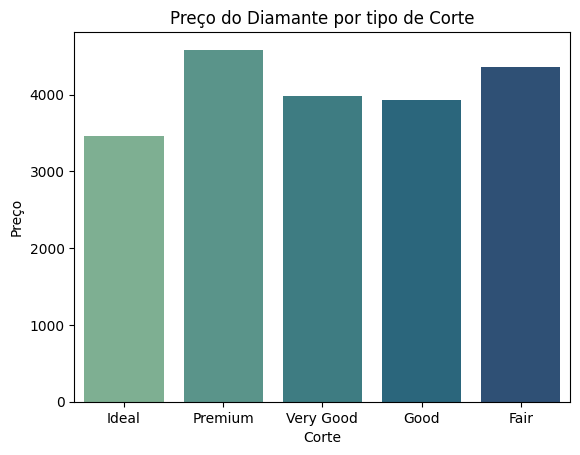

In [3]:
grafico_diamonds = sns.barplot(data=diamonds, x='cut', y='price', errorbar=None, palette='crest')
grafico_diamonds.set(title='Preço do Diamante por tipo de Corte', xlabel='Corte', ylabel='Preço')

**Insight do gráfico 1**:

- Não há muita diferença, em relação ao valor, entre os tipos de corte Good e Very Good.
- O corte Ideal é o mais barato e o Premium é o mais caro.

---

## 2\. Número de passageiros em dezembro por ano

In [4]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
# gráfico do exercício 2

flights = data.loc[data['month'] == 'Dec', ['year', 'passengers']].reset_index(drop=True)
flights

,year,passengers
0,1949,118
1,1950,140
2,1951,166
3,1952,194
4,1953,201
5,1954,229
6,1955,278
7,1956,306
8,1957,336
9,1958,337


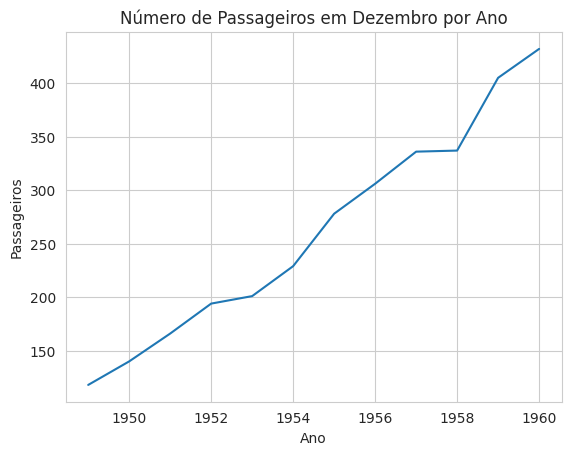

In [6]:
with sns.axes_style ('whitegrid'):
  grafico_flights = sns.lineplot(data=flights, x='year', y='passengers')
  grafico_flights.set(title='Número de Passageiros em Dezembro por Ano', xlabel='Ano', ylabel='Passageiros')

**Insight do gráfico 2**:
- Entre os anos de 1952-1953 e 1957-1958, o crescimento no número de passageiros foi menor, sendo o intervalo de 1957-1958 o menor.
- Em nenhum ano, houve queda no número de passageiros, só aumento.
- Entre os anos de 1955-1956 e 1958-1959, o crescimento no número de passageiros foi maior, sendo o intervalo de 1958-1959 o maior.

---

## 3\. Numero de passageiros por mês entre 1949 e 1959

In [7]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


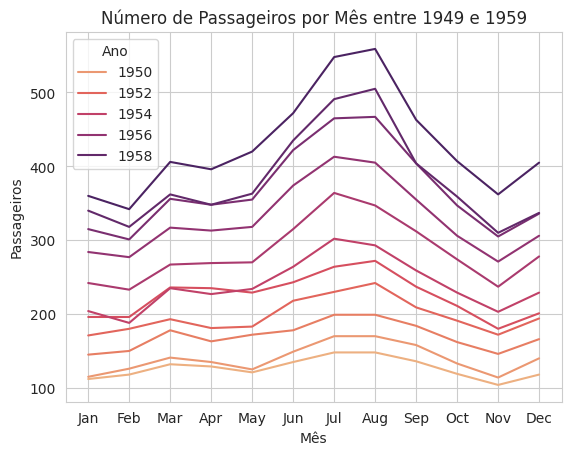

In [8]:
# gráfico do exercício 3

flights = data.query("1949 <= year < 1960")

with sns.axes_style('whitegrid'):
  grafico_flight = sns.lineplot(data=flights, x="month", y="passengers", hue="year", palette="flare")
  grafico_flight.set(title='Número de Passageiros por Mês entre 1949 e 1959', xlabel='Mês', ylabel='Passageiros');
  grafico_flight.get_legend().set_title("Ano");

**Insight do gráfico 3**:
- Os meses de Julho e Agosto possuem a maior quantidade de passageiros em todos os anos.
- Os meses de Fevereiro e Novembro possuem a menor quantidade de passageiros em todos os anos.
- Em todos os anos, percebe-se um aumento no número total de passageiros em relação ao ano anterior

---